# Global Food Waste Analysis
### By: Jack Blaes
## Introduction
According to the Food Aid Foundation at https://www.foodaidfoundation.org/world-hunger-statistics.html, more than 1 in 9 people around the globe are starving or undernourished. A key factor in understanding the problem of hunger is the problem of food waste. In this tutorial we will be looking at data surrounding food waste and searching for what that data can tell us about the problem of world hunger and more generally the global food situation. 

## Acquiring Data
To start we will import the necessary libraries. For more context, we recommend reading documentation on Python 3 (https://docs.python.org/3/), pandas (https://pandas.pydata.org/docs/), matplotlib.pyplot (https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html), numpy (https://numpy.org/doc/), and sklearn (https://scikit-learn.org/stable/).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import math

In this project we are using data from the Food and Agriculture Organization of the United Nations. This particular set of data is downloadable at http://www.fao.org/platform-food-loss-waste/flw-data/en/. We can download this data as a .csv file and upload it to our github page. We can then use pandas .read_csv function to create a dataframe out of the data in our github. This can be done with files on separate github pages so that if data is found already on github, it is a simple matter of running read_csv on the raw url to acquire the data.

In [2]:
#Run read_csv on url of raw data on github page
url = 'https://raw.githubusercontent.com/Jack1847/Jack1847.github.io/main/FoodWasteData.csv'
df = pd.read_csv(url)

Now that we have the data in a dataframe, we can start working with it. The dataframe is, however, quite large and so we cannot scroll through the entries individually to get a sense of what the data says. To start getting some sense of the data, we can see the column headings and the first few entries with the .head command.

In [3]:
#Show head of data
df.head()

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,...,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


## Tidying Data
Our current dataframe has 22 columns, many of which do not hold valuable information. We will narrow our data by only keeping what we wish to use. Right away we can see some things that we will not need in our analysis, namely "geographicaream49", "measureditemcpc", "method_datacollection", "tag_datacollection", "reference", and "url". We can also remove "region" because "country" is sufficient in this global analysis. We can also remove "percentage_loss_of_quantity" because "loss_per_clean" is sufficient for our uses. 

In [4]:
#Here we remove the undesired columns and output the head again
df.drop(["geographicaream49", "measureditemcpc", "method_datacollection", "tag_datacollection", "reference", "url"], axis = 1, inplace = True)
df.drop(["region", "percentage_loss_of_quantity"], axis = 1, inplace = True)
df.head()

,country,crop,timepointyears,loss_per_clean,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units
0,Bulgaria,Wheat,2000,1.80,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,Wheat,2000,1.80,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN
2,Myanmar,"Groundnuts, excluding shelled",2009,5.22,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN
3,Myanmar,"Groundnuts, excluding shelled",2008,5.43,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN
4,Myanmar,"Groundnuts, excluding shelled",2007,5.61,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN


This still leaves us with many columns. We can see by the NaN entries in the head that many of our columns do not have data for all our rows. In this analysis, we will remove the sparse columns except for "activity" because the data that does exist might show us how some of this food is expiring.

In [5]:
#Here we remove the undesired columns and output the head again
df.drop(["loss_quantity", "loss_qualitiative", "loss_monetary", "periodofstorage", "treatment", "samplesize", "units", "causeofloss"], axis = 1, inplace = True)
df.head()

,country,crop,timepointyears,loss_per_clean,activity,fsc_location1
0,Bulgaria,Wheat,2000,1.80,NaN,SWS_Total
1,Bulgaria,Wheat,2000,1.80,NaN,SWS_Total
2,Myanmar,"Groundnuts, excluding shelled",2009,5.22,NaN,SWS_Total
3,Myanmar,"Groundnuts, excluding shelled",2008,5.43,NaN,SWS_Total
4,Myanmar,"Groundnuts, excluding shelled",2007,5.61,NaN,SWS_Total


Now we can make the titles of these columns consistent and clear.

In [6]:
#Rename the columns and show the head again
df = df.rename(columns={"timepointyears": "year", "loss_per_clean": "percent_lost", "activity": "activity_when_lost"})
df = df.rename(columns={"fsc_location1": "location_of_loss"})
df.head()

,country,crop,year,percent_lost,activity_when_lost,location_of_loss
0,Bulgaria,Wheat,2000,1.80,NaN,SWS_Total
1,Bulgaria,Wheat,2000,1.80,NaN,SWS_Total
2,Myanmar,"Groundnuts, excluding shelled",2009,5.22,NaN,SWS_Total
3,Myanmar,"Groundnuts, excluding shelled",2008,5.43,NaN,SWS_Total
4,Myanmar,"Groundnuts, excluding shelled",2007,5.61,NaN,SWS_Total


Finally, we can change the float NaN to something more clear and easier to work with like the string "Unknown".

In [7]:
#Replace nans with string of unknown and show head
df = df.replace(float('nan'), "Unknown")
df.head()

,country,crop,year,percent_lost,activity_when_lost,location_of_loss
0,Bulgaria,Wheat,2000,1.80,Unknown,SWS_Total
1,Bulgaria,Wheat,2000,1.80,Unknown,SWS_Total
2,Myanmar,"Groundnuts, excluding shelled",2009,5.22,Unknown,SWS_Total
3,Myanmar,"Groundnuts, excluding shelled",2008,5.43,Unknown,SWS_Total
4,Myanmar,"Groundnuts, excluding shelled",2007,5.61,Unknown,SWS_Total


## Exploratory Data Analysis
Now that we have clearer data, we can start looking for patterns within the data. To do this, we will plot the data in a few different ways to show different attributes of it. First, we will plot percent loss versus year on a scatter plot. 

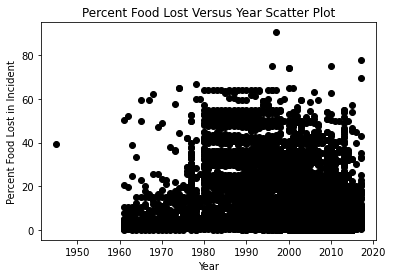

In [8]:
#Create appropriate x and y and plot with dots
x = df["year"]
y = df["percent_lost"]
plt.plot(x,y,'o', color='black')
plt.title("Percent Food Lost Versus Year Scatter Plot")
plt.xlabel("Year")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

As we can see from our plot, we have some more data tidying to do. There only seems to be one entry before 1960. We can remove this entry and remake the plot. 

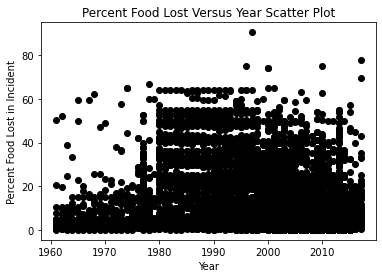

In [9]:
#Drop data with year less than 1960
df.drop(df[df["year"] < 1960].index, inplace = True) 
#Create appropriate x and y and plot with dots
x = df["year"]
y = df["percent_lost"]
plt.plot(x,y,'o', color='black')
plt.title("Percent Food Lost Versus Year Scatter Plot")
plt.xlabel("Year")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

This plot seems to indicate an increase in high food waste percentages from 1960 to 1980 and a decrease from 1990 to 2017. The data is, however, too clustered to get a clear sense of density. For this, we can use box plots. To make the box plots clear, we will create a new column, decade, and create box plots for each decade rather than each year.

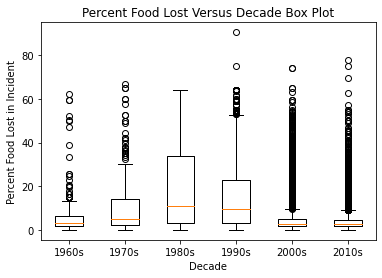

In [10]:
#Convert each year in df to decade and add to array
decades = []
for year in df["year"]:
    decade = year/10
    decade = math.trunc(decade)
    decade = decade*10
    decades.append(decade)
#Make new column in df that has decade
df["decade"] = decades
#Run through each decade and add percent lost with that decade to different index of decade_groups
decade_groups = []
decade = 1960
while (decade < 2020):
    decade_groups.append(df[df["decade"] == decade]["percent_lost"])
    decade = decade + 10
#make typed np array to allow boxplot to work
decade_groups = np.array(decade_groups, dtype="object") 
plt.boxplot(decade_groups)
#Rename x axis markings
plt.xticks([1, 2, 3, 4, 5, 6], ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"])
plt.title("Percent Food Lost Versus Decade Box Plot")
plt.xlabel("Decade")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

Our initial thoughts on the data hold true, and it is clearly shown now. The interquartile range (where the center 50 percent of the data lies) expands and increases from 1960 to 1980, then contracts and decreases from 1980 to 2017. Our earlier graph showed strong clusters below 20 percent in recent years. This new visualization shows us that more recent data is actually highly concentrated below 10 percent. This clarification shows that current food waste incidents have historically very low loss percentages. This visualization does not, however, show us the frequency of food waste throughout time. For this we can use a histogram grouped by year.

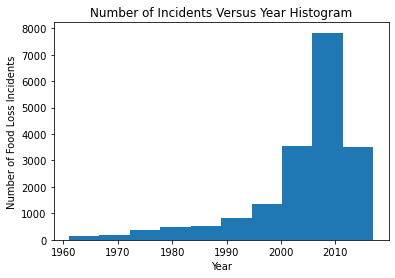

In [11]:
#Make histogram of year
plt.hist(df["year"])
plt.title("Number of Incidents Versus Year Histogram")
plt.xlabel("Year")
plt.ylabel("Number of Food Loss Incidents")
plt.show()

As the histogram shows, while percent loss of any incident has decreased significantly from its height, the number of incidents seems to be very high historically.

Our next exploration will focus on crops. We will plot percent lost versus crop to see if there is any correlation there.

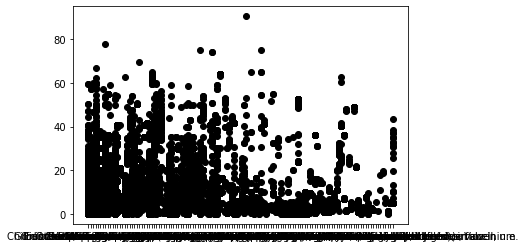

Text(0, 0.5, 'Percent Food Lost in Incident')

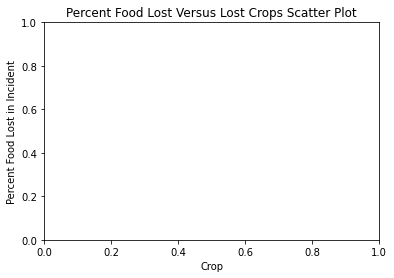

In [12]:
#Create appropriate x and y and plot with dots
x = df["crop"]
y = df["percent_lost"]
plt.plot(x,y,'o', color='black')
plt.show()
plt.title("Percent Food Lost Versus Lost Crops Scatter Plot")
plt.xlabel("Crop")
plt.ylabel("Percent Food Lost in Incident")

We have now run into a problem. There are far too many crops to reasonably plot together. We could do many things to work around this problem such as creating categories and sorting those crops into those catagories, creating many different plots, or by limiting which crops we look at. We will be doing the latter here. We will be isolating the 10 crops with the highest number of incidents and then plotting their percent loss. 

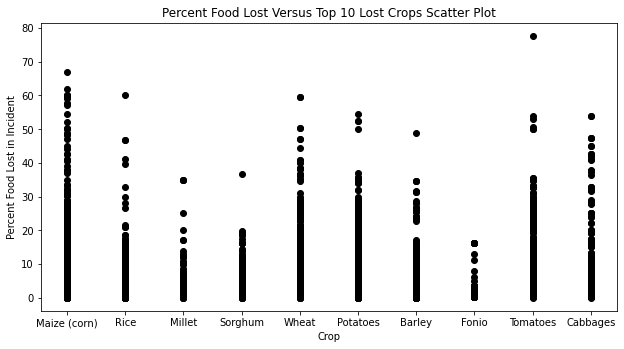

In [13]:
#Create a dataset for each unique crop
crop_data = []
crops = []
for crop in df["crop"]:
    #Is it a new crop
    if crop not in crops:
        crops.append(crop)
        #Add data of new crop to dataset
        crop_data.append(df[df["crop"] == crop])
#Find the ten crops with the highest number of entries
k = 0
ten_crops = []
#Run 10 times
while k < 10:
    #Find data with the max length in crop dataset
    max = len(crop_data[0])
    mi = 0
    i = 0
    while i < len(crop_data):
        if len(crop_data[i]) > max:
            #New max found
            max = len(crop_data[i])
            mi = i
        i = i + 1
    #Add max length crop to set of ten
    ten_crops.append(crop_data[mi])
    #Remove added crop so that it wont be found next run of loop
    del crop_data[mi]
    k = k + 1
i = 0
#Make plot bigger
fig= plt.figure(figsize=(10,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#Plot each crop in max ten
while i < 10:
    x = ten_crops[i]["crop"]
    y = ten_crops[i]["percent_lost"]
    axes.plot(x,y,'o', color='black')
    i = i + 1
plt.title("Percent Food Lost Versus Top 10 Lost Crops Scatter Plot")
plt.xlabel("Crop")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

Currently, it looks as if corn, wheat and potatoes are the most susceptible to food waste. We can once again use boxplots to clarify this plot.

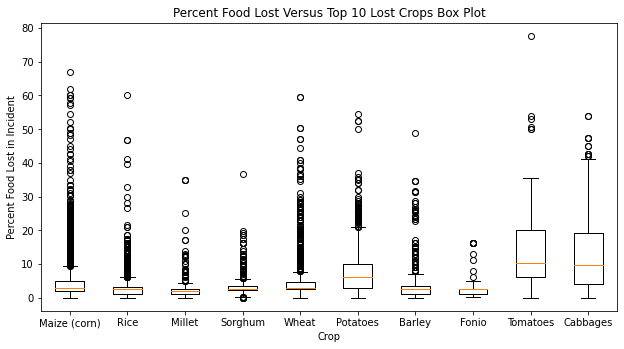

In [14]:
#Run through each of 10 crops and add percent lost data with that crop to different index of array
crop_groups = []
i = 0
while (i < 10):
    crop_groups.append(ten_crops[i]["percent_lost"])
    i = i + 1
#make typed np array to allow boxplot to work
crop_groups = np.array(crop_groups, dtype="object")
#Make plot bigger
fig= plt.figure(figsize=(10,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.boxplot(crop_groups)
#Rename x axis markings
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["Maize (corn)", "Rice", "Millet", "Sorghum", "Wheat", "Potatoes", "Barley", "Fonio", "Tomatoes", "Cabbages"])
plt.title("Percent Food Lost Versus Top 10 Lost Crops Box Plot")
plt.xlabel("Crop")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

Now with this clarification, we can see that tomatoes, cabbages, and potatoes have the worst outcomes in general.

Our next exploration will look at how countries stack up. Our data has entries for most countries in the world so we can anticipate a similar problem we had with crops. We will start by limiting our number of countries to 10 as we did with crops.

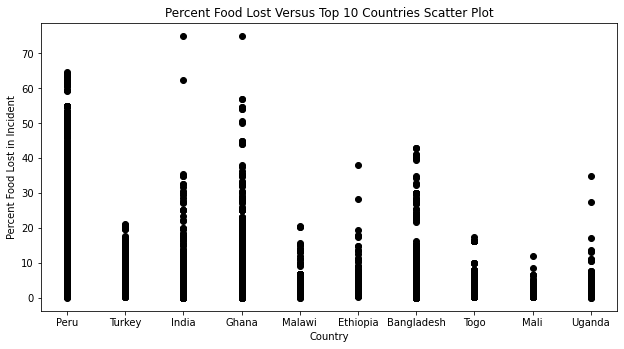

In [15]:
#Create a dataset for each unique country
country_data = []
countries = []
for country in df["country"]:
    #Is it a new country
    if country not in countries:
        countries.append(country)
        #Add data of new country to dataset
        country_data.append(df[df["country"] == country])
#Find the ten countries with the highest number of entries
k = 0
ten_countries = []
#Run 10 times
while k < 10:
    #Find data with the max length in country dataset
    max = len(country_data[0])
    mi = 0
    i = 0
    while i < len(country_data):
        if len(country_data[i]) > max:
            max = len(country_data[i])
            mi = i
        i = i + 1
    #Add max length country to set of ten
    ten_countries.append(country_data[mi])
    #Remove added country so that it wont be found next run of loop
    del country_data[mi]
    k = k + 1
i = 0
#Make plot bigger
fig= plt.figure(figsize=(10,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#Plot each country in max ten
while i < 10:
    x = ten_countries[i]["country"]
    y = ten_countries[i]["percent_lost"]
    axes.plot(x,y,'o', color='black')
    i = i + 1
plt.title("Percent Food Lost Versus Top 10 Countries Scatter Plot")
plt.xlabel("Country")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

Currently, it looks as if Peru, Ghana, and India are the most susceptible to food waste. We can once again use boxplots to clarify this plot.

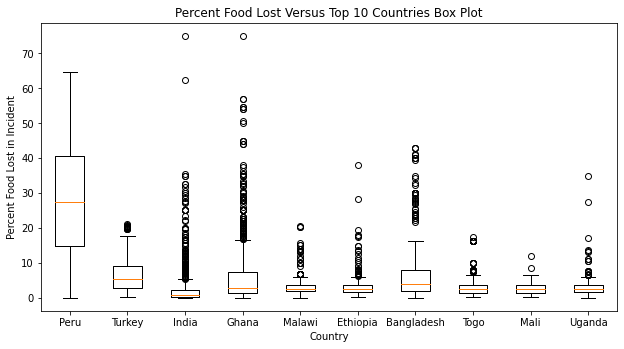

In [16]:
#Run through each of 10 countries and add percent lost data with that country to different index of array
country_groups = []
i = 0
while (i < 10):
    country_groups.append(ten_countries[i]["percent_lost"])
    i = i + 1
#make typed np array to allow boxplot to work
country_groups = np.array(country_groups, dtype="object") 
#Make plot bigger
fig= plt.figure(figsize=(10,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.boxplot(country_groups)
#Rename x axis markings
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["Peru", "Turkey", "India", "Ghana", "Malawi", "Ethiopia", "Bangladesh", "Togo", "Mali", "Uganda"])
plt.title("Percent Food Lost Versus Top 10 Countries Box Plot")
plt.xlabel("Country")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

The boxplots now clarify that Peru, Turkey, and Ghana are most susceptible to high rates of food loss. 

In our final examples of data exploration, we will look at the activities and locations of food loss to see if there is some correlation there. We will do this by making scatterplots of the 10 most common of these factors versus percent lost to see which factors have the worst rates of food waste.

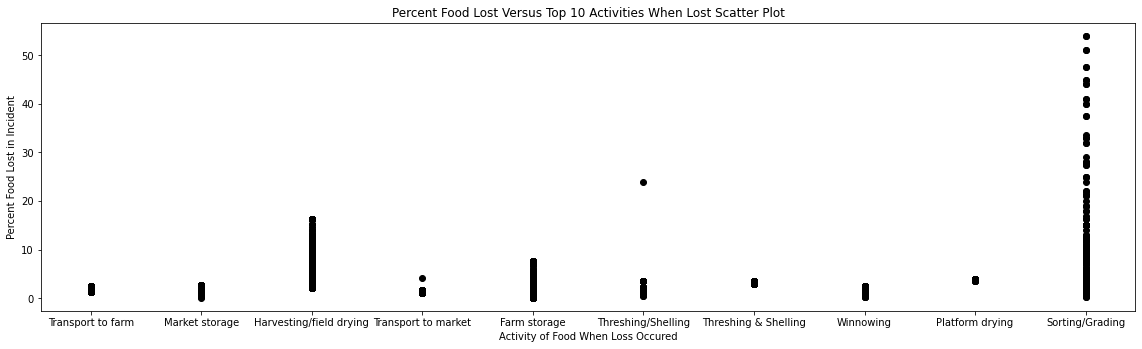

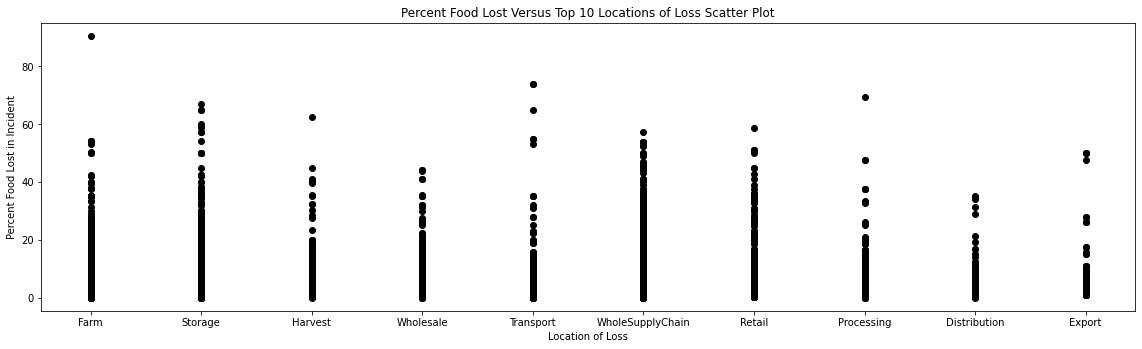

In [17]:
#Create a dataset for each unique activity
activity_data = []
activities = []
for activity in df["activity_when_lost"]:
    #Is it a new activity
    if activity not in activities and activity != "Unknown":
        activities.append(activity)
        #Add data of new activity to dataset
        activity_data.append(df[df["activity_when_lost"] == activity])
#Find the ten activites with the highest number of entries
k = 0
ten_activities = []
#Run 10 times
while k < 10:
    #Find data with the max length in activity dataset
    max = len(activity_data[0])
    mi = 0
    i = 0
    while i < len(activity_data):
        if len(activity_data[i]) > max:
            max = len(activity_data[i])
            mi = i
        i = i + 1
    #Add max length activity to set of ten
    ten_activities.append(activity_data[mi])
    #Remove added activity so that it wont be found next run of loop
    del activity_data[mi]
    k = k + 1
i = 0
#Make plot bigger
fig= plt.figure(figsize=(19,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#Plot each activity in max ten
while i < 10:
    x = ten_activities[i]["activity_when_lost"]
    y = ten_activities[i]["percent_lost"]
    axes.plot(x,y,'o', color='black')
    i = i + 1
plt.title("Percent Food Lost Versus Top 10 Activities When Lost Scatter Plot")
plt.xlabel("Activity of Food When Loss Occured")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

#Create a dataset for each unique location
location_data = []
locations = []
for location in df["location_of_loss"]:
    #Is it a new location
    if location not in locations and location != "Unknown" and location != "SWS_Total":
        locations.append(location)
        #Add data of new location to dataset
        location_data.append(df[df["location_of_loss"] == location])
#Find the ten locations with the highest number of entries
k = 0
ten_locations = []
#Run 10 times
while k < 10:
    #Find data with the max length in location dataset
    max = len(location_data[0])
    mi = 0
    i = 0
    while i < len(location_data):
        if len(location_data[i]) > max:
            max = len(location_data[i])
            mi = i
        i = i + 1
    #Add max length location to set of ten
    ten_locations.append(location_data[mi])
    #Remove added location so that it wont be found next run of loop
    del location_data[mi]
    k = k + 1
i = 0
#Make plot bigger
fig= plt.figure(figsize=(19,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#Plot each location in max ten
while i < 10:
    x = ten_locations[i]["location_of_loss"]
    y = ten_locations[i]["percent_lost"]
    axes.plot(x,y,'o', color='black')
    i = i + 1
plt.title("Percent Food Lost Versus Top 10 Locations of Loss Scatter Plot")
plt.xlabel("Location of Loss")
plt.ylabel("Percent Food Lost in Incident")
plt.show()


Once again we will clarify with box plots.

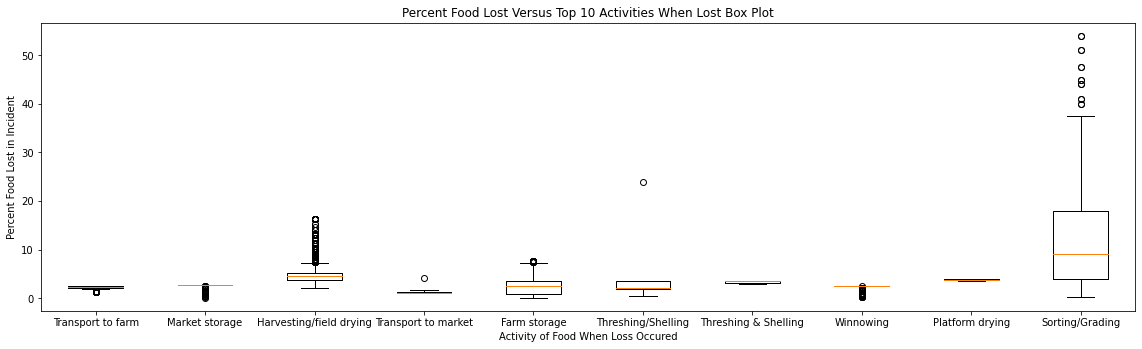

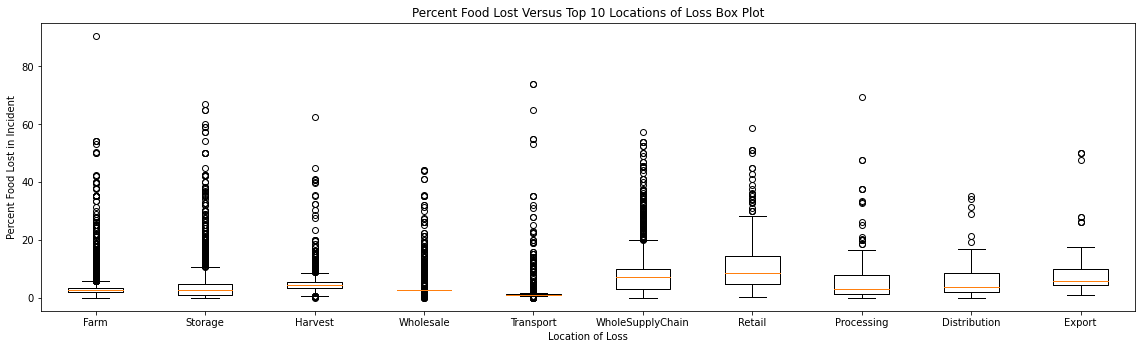

In [18]:
#Run through each of 10 activities and add percent lost data with that activity to different index of array
activity_groups = []
activity_names = []
i = 0
while (i < 10):
    #Get name of each top ten activity
    for name in ten_activities[i]["activity_when_lost"]:
        activity_names.append(name)
        break;
    activity_groups.append(ten_activities[i]["percent_lost"])
    i = i + 1
#make typed np array to allow boxplot to work
activity_groups = np.array(activity_groups, dtype="object") 
#Make plot bigger
fig= plt.figure(figsize=(19,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.boxplot(activity_groups)
#Rename x axis markings
plt.title("Percent Food Lost Versus Top 10 Activities When Lost Box Plot")
plt.xlabel("Activity of Food When Loss Occured")
plt.ylabel("Percent Food Lost in Incident")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], activity_names)
plt.show()

#Run through each of 10 locations and add percent lost data with that location to different index of array
location_groups = []
location_names = []
i = 0
while (i < 10):
    #Get name of each top ten location
    for name in ten_locations[i]["location_of_loss"]:
        location_names.append(name)
        break;
    location_groups.append(ten_locations[i]["percent_lost"])
    i = i + 1
#make typed np array to allow boxplot to work
location_groups = np.array(location_groups, dtype="object") 
#Make plot bigger
fig= plt.figure(figsize=(19,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.boxplot(location_groups)
#Rename x axis markings
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], location_names)
plt.title("Percent Food Lost Versus Top 10 Locations of Loss Box Plot")
plt.xlabel("Location of Loss")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

From these visualizations we can see that retail and sorting and grading are the worst offenders of food waste. This is probably because many crops that have visual defects are disposed of rather than go to market, and markets are consistently overstocked and will throw out food when it reaches a sell by date that does not indicate true inedibility.

## Hypothesis Testing and Machine Learning
Now that we have some sense of what the data is saying, we can use techniques such as linear regression to predict future outcomes. For our project, we will look at food waste over time and see what we can predict going forward. Let us start with a hypothesis. As time goes on, technology and methods for food distribution become more advanced and incidents of food waste become more contained and thus percent food waste per incident will generally decrease. In our data exploration, our data seemed to indicate just this. Let us use some linear regression to verify this. 

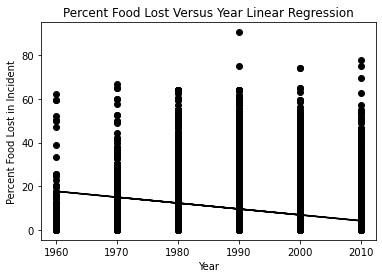

In [19]:
#Take the decade and percent lost columns and reshape them for regression
x = df["decade"]
y = df["percent_lost"]
X = np.array(x).reshape(-1, 1)
y2 = np.array(y).reshape(-1, 1)
#Run regression and predict an output
reg = LinearRegression().fit(X, y2)
Y = reg.predict(X)
#Plot the output against the original data
plt.plot(x, y, 'o', color='black')
plt.plot(X, Y, color ='k')
plt.title("Percent Food Lost Versus Year Linear Regression")
plt.xlabel("Year")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

This simple linear regression does seem to verify our hypothesis. We can expand our understanding by narrowing the data we are looking at. Let us repeat the above linear regression, but looking at each of the top 3 problematic crops, countries, activities, and locations as indicated by our box plots. Also, because we are narrowing the data, we will use year instead of decade this time.

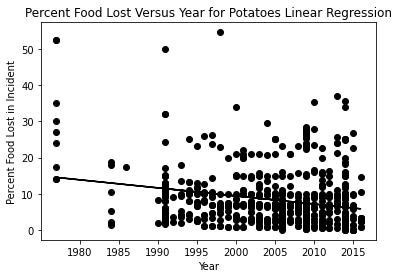

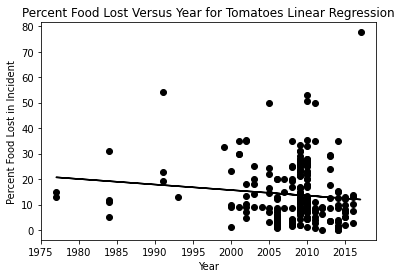

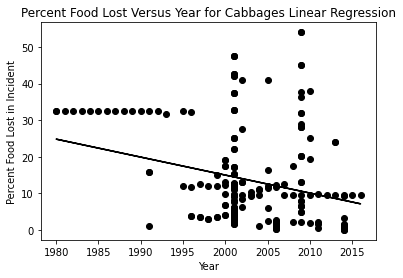

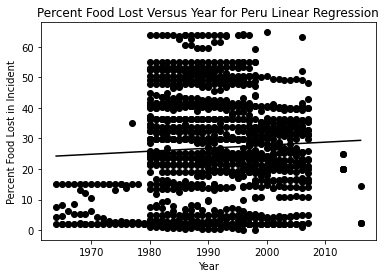

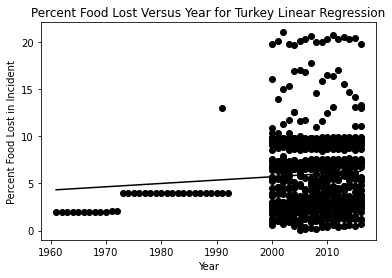

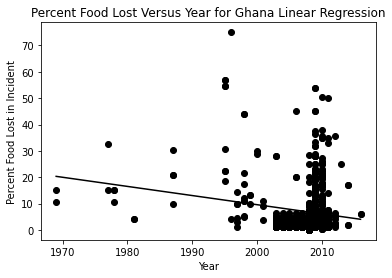

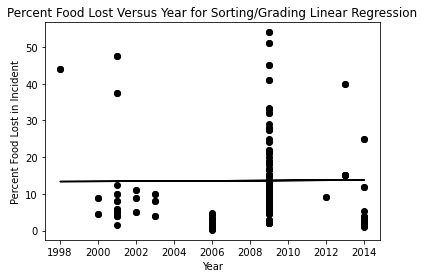

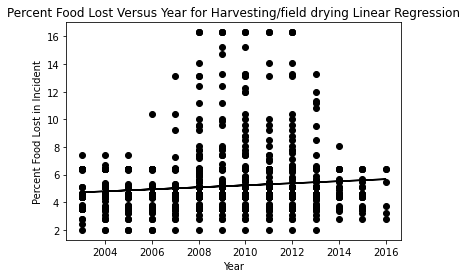

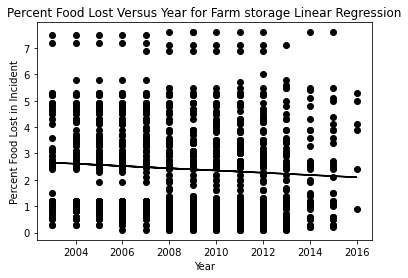

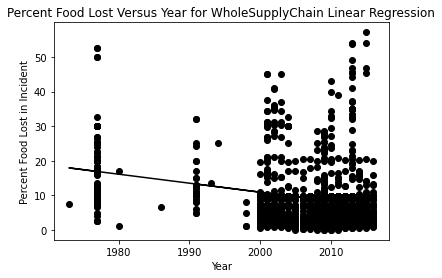

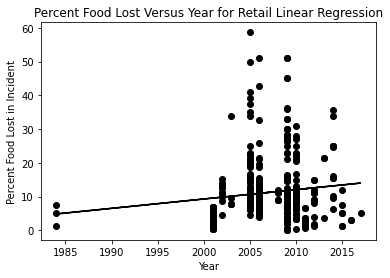

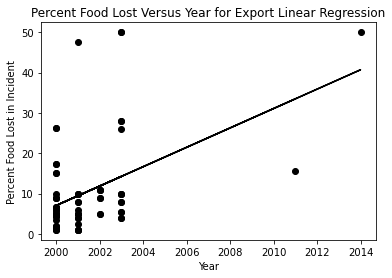

In [20]:
#Set up arrays with names of problematic areas
crops = ["Potatoes", "Tomatoes", "Cabbages"]
countries = ["Peru", "Turkey", "Ghana"]
activities = ["Sorting/Grading", "Harvesting/field drying", "Farm storage"]
locations = ["WholeSupplyChain", "Retail", "Export"]
groups = [crops, countries, activities, locations]
#Set up array of column names
group_labels = ["crop", "country", "activity_when_lost", "location_of_loss"]
i = 0
for group in groups:
    for name in group:
        #Take the appropriate year and percent lost columns and reshape them for regression
        x = df[df[group_labels[i]] == name]["year"]
        y = df[df[group_labels[i]] == name]["percent_lost"]
        X = np.array(x).reshape(-1, 1)
        y2 = np.array(y).reshape(-1, 1)
        #Run regression and predict an output
        reg = LinearRegression().fit(X, y2)
        Y = reg.predict(X)
        #Plot the output against the original data
        plt.plot(x, y, 'o', color='black')
        plt.plot(X, Y, color ='k')
        plt.title("Percent Food Lost Versus Year for " + name + " Linear Regression")
        plt.xlabel("Year")
        plt.ylabel("Percent Food Lost in Incident")
        plt.show()
    i = i + 1

We now have much to take in here. We can see that some graphs have a positive linear regression while some have constant or even decreasing regression. We can split our findings into three groups:

### Increased Food Loss Over Time:
Turkey

Peru

Harvesting/field drying

Retail

Export

### Constant Food Loss Over Time:
Sorting/Grading


### Decreased Food Loss Over Time:
Potatoes

Tomatoes

Cabbages

Ghana

Farm Storage

WholeSupplyChain


Our hypothesis seems to hold about half the time in the most problematic areas of food waste. 

## Conclusion
Food waste is a problem that we have been facing for years. We hope that we would move towards fixing this problem, and it seems like, generally, we are. However, a deeper examination reveals that in some of the most devastating areas of food waste, the problem is worsening rather than improving. From this data analysis, we can see that countries such as Peru and Turkey and locations within the distribution of food such as retail and exports have worsening food waste. Increased efforts to mitigate food waste in these four areas are needed. If you would like to investigate this data further, there are many more data analysis techniques that can be applied to this data set. Looking into polynomial (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and logistic (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) regression might be a place to continue from this tutorial.